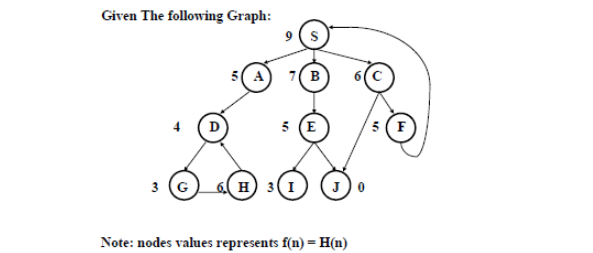

### Question:
Show a Trace using Simple Hill Climbing and Steepest Ascent Hill Climbing Would they find the goal? If the search Starts from the right side of the tree would they find the goal?

In [114]:
class Graph:
    def __init__(self):
        self.graph = dict()
        
    def addVertex(self, ver):
        if ver in self.graph.keys():
            print("vertex ", ver, " already exists in graph")    
        else:
            self.graph[ver] = []
        
    def addEdge(self, verFrom, verTo, weight = None):
        if verFrom not in self.graph.keys():
            print("vertex ", verFrom, " not exists in graph")    
        elif verTo not in self.graph.keys():
            print("vertex ", verTo, " not exists in graph")
        else:
            if weight == None:
                self.graph[verFrom].append(verTo)
            else:
                self.graph[verFrom].append([verTo, weight])
                
    def printGraph(self):
        print(self.graph)

In [115]:
def simpleHillClimbing(start, goal, graph, heu):
    currentState = start
    path = list()
    cost = 0
    path.append(currentState)
    
    while (True):
        if currentState == goal:
            return [path, cost]
        else:
            edges = graph.graph.get(currentState)
            tempList = []
            for e in edges:
                tempList.append([heu[e],e])
            tempList.sort()
            best = tempList[0]
            if(best[0] < heu[currentState]):
                path.append(best[1])
                currentState = best[1]
                cost = cost + best[0]
            else:
                return [path,cost]

In [116]:
from queue import PriorityQueue

def steepestHillClimbing(start, goal, graph, heu):
    currentState = start
    path = list()
    cost = 0
    path.append(currentState)
    pqueue = []
    
    while (True):
        if currentState == goal:
            return [path, cost]
        else:
            edges = graph.graph.get(currentState)
            
            for edge in edges:
                pqueue.append([heu[edge], edge])
            pqueue.sort()
            print(pqueue)
            edge = pqueue[0]
            pqueue.pop(0)
            if edge is not None and heu[currentState] > heu[edge[1]]:
                currentState = edge[1]
                cost = cost + heu[edge[1]]
                path.append(currentState)
            else:
                return [path, cost]

In [117]:
import random

graph = Graph()
graph.addVertex('S')
graph.addVertex('A')
graph.addVertex('B')
graph.addVertex('C')
graph.addVertex('D')
graph.addVertex('E')
graph.addVertex('F')
graph.addVertex('G')
graph.addVertex('H')
graph.addVertex('I')
graph.addVertex('J')

graph.addEdge('S', 'A')
graph.addEdge('S', 'B')
graph.addEdge('S', 'C')
graph.addEdge('A', 'D')
graph.addEdge('B', 'E')
graph.addEdge('C', 'F')
graph.addEdge('C', 'J')
graph.addEdge('D', 'G')
graph.addEdge('E', 'I')
graph.addEdge('E', 'J')
graph.addEdge('F', 'S')
graph.addEdge('G', 'H')
graph.addEdge('H', 'D')


heu = dict()
heu['S'] = 9
heu['A'] = 5
heu['B'] = 7
heu['C'] = 6
heu['D'] = 4
heu['E'] = 5
heu['F'] = 5
heu['G'] = 3
heu['H'] = 6
heu['I'] = 3
heu['J'] = 0

In [111]:
# Implement Simple Hill Climbing Search
data = simpleHillClimbing("S", "J", graph, heu)
print("Path: ", data[0])
print("Cost: ", data[1])

Path:  ['S', 'A', 'D', 'G']
Cost:  12


In [118]:
# Implement Steepest Ascent Hill Climbing Search
data = steepestHillClimbing("S", "J", graph, heu)
print("Path: ", data[0])
print("Cost: ", data[1])

[[5, 'A'], [6, 'C'], [7, 'B']]
[[4, 'D'], [6, 'C'], [7, 'B']]
[[3, 'G'], [6, 'C'], [7, 'B']]
[[6, 'C'], [6, 'H'], [7, 'B']]
Path:  ['S', 'A', 'D', 'G']
Cost:  12


In [ ]:
If the search Starts from the right side of the tree, 
they would not find the goal as you can see from the 
above implemented code that we traversed the graph from the right side and it did not find the goal. 